<변수 선택 Process>

1. 등분산성을 고려한 t-test를 통한 변수 선정) 46 -> 19
2. 전진선택/후진소거/단계별선택) 19 -> 9
3. 다중공선성을 고려하여 최종 변수 선택) 9 -> 9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/금융빅데이터분석가/기업 부실 예측/data

/content/drive/MyDrive/금융빅데이터분석가/기업 부실 예측/data


In [ ]:
# 실행 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,804 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
# 함수 임포트

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
import statsmodels.api as sm
from statsmodels.api import add_constant 

In [ ]:
data = pd.read_csv("전처리완료3.csv", index_col = 0)
data.head(5)

,index,회사명,거래소코드,회계년도,총자본순이익률,총자본영업이익률,자기자본순이익률,매출액총이익률,매출액영업이익률,금융비용부담률,자기자본비율,부채비율,유동비율,당좌비율,차입금의존도,비유동장기적합률,총자본회전률,자기자본회전률,운전자본회전률,매출채권회전률,재고자산회전률,매입채무회전률,총자본증가율,유동자산증가율,매출액증가율,순이익증가율,자기자본증가율,CASH FLOW 대 부채비율,CASH FLOW 대 매출액비율,유형자산증가율,차입금비율,영업이익(손실)(천원),법인세비용차감전(계속사업)손익(천원),자산(*)(천원),자본(*)(천원),비유동자산(*)(천원),현금 및 현금성자산(*)(천원),유동부채(*)(천원),영업활동으로 인한 현금흐름(*)(천원),매출액(영업수익)(*)(천원),당기순이익(손실)(천원),부도여부,총자산순이익률,총자산영업이익률,고정비율,현금비율,ocf 대 유동부채,총자산회전율,총자산증가율
1,13917,동화약품(주),20,2007,4.13,7.26,5.09,48.87,9.53,-1.49,576.40,22.95,509.94,441.93,4.93,37.87,0.76,0.94,0.0,2.86,8.57,34.94,2.76,1.77,-2.67,5.26,3.39,66.89,16.62,3.76,6.06,14171262.0,13519803.0,197948382.0,160998236.0,65095476.0,9428619.0,26052899.0,23185889.0,148738623.0,0.0,0.0,0.000000,0.071591,0.348009,0.361903,0.889954,0.761634,0.027613
2,13918,동화약품(주),20,2008,10.28,16.04,12.64,55.66,19.16,-2.06,641.36,23.04,414.24,334.58,2.80,44.83,0.84,1.03,0.0,3.81,7.97,30.28,11.35,2.65,17.74,166.52,11.27,56.73,13.37,33.72,3.44,33544838.0,32871150.0,220422961.0,179141892.0,84053277.0,4677396.0,32920471.0,23655312.0,175119773.0,21495381.0,0.0,0.097519,0.152184,0.396361,0.142082,0.718559,0.837150,0.113538
3,13919,동화약품(주),20,2009,10.72,15.03,14.83,55.77,21.19,-1.75,735.24,51.67,158.50,107.06,10.70,79.64,0.71,0.98,0.0,4.15,5.58,28.30,41.31,-6.52,7.70,32.67,14.64,25.83,14.53,136.95,16.23,39963969.0,41461416.0,311472628.0,205363087.0,183993477.0,10967304.0,80426807.0,31155090.0,188607515.0,28518530.0,0.0,0.091560,0.128307,0.643807,0.136364,0.387372,0.709190,0.413068
4,13913,동화약품(주),20,2010,1.68,3.18,2.54,43.57,4.79,0.68,765.86,51.47,147.41,100.19,13.12,83.76,0.66,1.01,0.0,3.74,5.52,12.01,0.00,0.00,0.00,0.00,0.00,16.88,8.63,0.00,19.87,10317239.0,5430195.0,324009899.0,213915026.0,202168003.0,18140995.0,82657565.0,18587828.0,215279424.0,5427207.0,0.0,0.016750,0.031842,0.681681,0.219472,0.224878,0.677531,0.040252
5,13912,동화약품(주),20,2011,5.33,7.72,7.97,46.01,10.92,0.46,822.10,47.82,150.60,114.00,2.95,82.33,0.71,1.06,0.0,4.05,6.59,11.73,4.76,8.60,8.96,225.75,7.34,29.52,13.82,26.12,4.35,25621666.0,19033095.0,339431477.0,229623874.0,207110122.0,35134387.0,87860192.0,46244032.0,234561984.0,17679223.0,0.0,0.052085,0.075484,0.652348,0.399890,0.526337,0.707107,0.047596


In [ ]:
data.drop(['index', '회사명','거래소코드', '회계년도'], axis = 1, inplace=True)
data.shape

(17591, 45)

In [ ]:
data.부도여부.value_counts()

0.0    17401
1.0      190
Name: 부도여부, dtype: int64

# 1. T-test

In [ ]:
# 부도여부로 데이터 나누기
from scipy import stats

data1 = data[data['부도여부']==1]
data2 = data[data['부도여부']==0]

column_list = data.drop(['부도여부'],axis = 1).columns

good_count = 0
bad_count = 0
good_column_list = []
for i in column_list :
    x = stats.levene(data1[i],data2[i])
    if x[1]>0.05: #등분산의 경우
        t, p = stats.ttest_ind(data1[i], data2[i])
        print("Student's t-test Result\n --------------------")
        if p > 0.05 :
            print(f"{i} 의 p-value =", round(p, 5), "통계적으로 유의미하지 않음\n")
            bad_count += 1
        else :
            print(f"{i} 의 p-value =", round(p, 5), "통계적으로 유의미\n")
            good_count += 1
            good_column_list.append(i)
    else : #이분산의 경우
        t, p = stats.ttest_ind(data1[i], data2[i], equal_var=False)
        print("Welch's t-test Result\n --------------------")
        if p > 0.05 :
            print(f"{i} 의 p-value =", round(p, 5), "통계적으로 유의미하지 않음\n")
            bad_count += 1
        else :
            print(f"{i} 의 p-value =", round(p, 5), "통계적으로 유의미\n")
            good_count +=1
            good_column_list.append(i)

Welch's t-test Result
 --------------------
총자본순이익률 의 p-value = 0.0 통계적으로 유의미

Welch's t-test Result
 --------------------
총자본영업이익률 의 p-value = 0.0 통계적으로 유의미

Welch's t-test Result
 --------------------
자기자본순이익률 의 p-value = 0.0 통계적으로 유의미

Welch's t-test Result
 --------------------
매출액총이익률 의 p-value = 0.0 통계적으로 유의미

Student's t-test Result
 --------------------
매출액영업이익률 의 p-value = 0.4437 통계적으로 유의미하지 않음

Student's t-test Result
 --------------------
금융비용부담률 의 p-value = 0.0629 통계적으로 유의미하지 않음

Student's t-test Result
 --------------------
자기자본비율 의 p-value = 0.62654 통계적으로 유의미하지 않음

Welch's t-test Result
 --------------------
부채비율 의 p-value = 0.06799 통계적으로 유의미하지 않음

Student's t-test Result
 --------------------
유동비율 의 p-value = 0.06094 통계적으로 유의미하지 않음

Student's t-test Result
 --------------------
당좌비율 의 p-value = 0.11715 통계적으로 유의미하지 않음

Welch's t-test Result
 --------------------
차입금의존도 의 p-value = 0.0 통계적으로 유의미

Welch's t-test Result
 --------------------
비유동장기적합률 의 p-value = 0.00771 통계적으

In [ ]:
print(good_count, bad_count)
print(good_column_list)

19 25
['총자본순이익률', '총자본영업이익률', '자기자본순이익률', '매출액총이익률', '차입금의존도', '비유동장기적합률', '총자본회전률', '자기자본회전률', 'CASH FLOW 대 부채비율', '영업이익(손실)(천원)', '법인세비용차감전(계속사업)손익(천원)', '자산(*)(천원)', '현금 및 현금성자산(*)(천원)', '매출액(영업수익)(*)(천원)', '당기순이익(손실)(천원)', '총자산순이익률', '총자산영업이익률', 'ocf 대 유동부채', '총자산회전율']


In [ ]:
# 유의미한 변수만 추린 데이터
data_1 = data.loc[:, good_column_list]
data_1 = pd.concat([data_1, data['부도여부']], axis=1)
data_1.shape

(17591, 20)

# 2. 래퍼 방식

## 1) 전진선택법

In [ ]:
X = data_1.drop(['부도여부'], axis=1)
y = data_1['부도여부']

In [ ]:
# 변수 선택법

def processSubset(X,y, feature_set):
  X = add_constant(X)
  model = sm.OLS(y,X[list(feature_set)])  # modeling
  regr = model.fit()  # 모델학습
  AIC = regr.aic    # 모델의 AIC
  return {"model" : regr , "AIC" : AIC}

# 전체 변수의 AIC test
print(processSubset(X=X, y=y, feature_set=X.columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f4321210890>, 'AIC': -31627.519731823326}


In [ ]:
# 전진선택법(step=1)
import time
def forward(X,y,predictors):
	
  # predictor - 현재 선택되어있는 변수
  # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류

  remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
  tic = time.time()
  results = []
  for p in remaining_predictors :
    results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))

  # 데이터프레임으로 변환
  models = pd.DataFrame(results)

  # AIC가 가장 낮은 것을 선택
  best_model = models.loc[models['AIC'].argmin()] # index
  toc = time.time()
  print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
  print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
  return best_model
    
### 전진선택법 모델

def forward_model(X,y):

  Fmodels = pd.DataFrame(columns=["AIC","model"])
  tic  = time.time()

  # 미리 정의된 데이터 변수
  predictors = []

  # 변수 1~10개 : 0-9 -> 1-10
  for i in range(1,len(X.columns.difference(['const']))+1):
    Forward_result = forward(X=X,y=y,predictors=predictors)
    if i > 1:
      if Forward_result["AIC"] > Fmodel_before:
        break
    Fmodels.loc[i] = Forward_result
    predictors = Fmodels.loc[i]["model"].model.exog_names
    Fmodel_before = Fmodels.loc[i]["AIC"]
    predictors = [k for k in predictors if k != 'const']
  toc = time.time()
  print("Total elapsed time:",(toc-tic), "seconds.")

  return (Fmodels['model'][len(Fmodels['model'])])

In [ ]:
forwardBestModel = forward_model(X, y)

Processed  19 models on 1 predictors in 0.274111270904541
Selected predictors: ['총자산순이익률', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f4317960d10>
Processed  18 models on 2 predictors in 0.28754138946533203
Selected predictors: ['총자산순이익률', '차입금의존도', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f431798c310>
Processed  17 models on 3 predictors in 0.26456665992736816
Selected predictors: ['총자산순이익률', '차입금의존도', '총자본영업이익률', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f431798cf50>
Processed  16 models on 4 predictors in 0.27294206619262695
Selected predictors: ['총자산순이익률', '차입금의존도', '총자본영업이익률', '총자산영업이익률', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f431798c110>
Processed  15 models on 5 predictors in 0.2632603645324707
Selected predictors: ['총자산순이익률', '차입금의존도', '총자본영업이익률', '총자산영업이익률', '비유동장기적합률', 'const'] AIC: 

In [ ]:
# 전진선택법 AIC
forwardBestModel.aic

-31640.66152513023

In [ ]:
print(forwardBestModel.summary())

                            OLS Regression Results                            
Dep. Variable:                   부도여부   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:18:54   Log-Likelihood:                 15830.
No. Observations:               17591   AIC:                        -3.164e+04
Df Residuals:                   17581   BIC:                        -3.156e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총자산순이익률       -0.0568      0.003    -20.496      0.0

In [ ]:
# 9개
print("전진선택법 결과: \n")
forwardBestModel.params

전진선택법 결과: 



총자산순이익률      -0.056849
차입금의존도        0.000409
총자본영업이익률     -0.000817
총자산영업이익률      0.021444
비유동장기적합률      0.000042
자기자본회전률      -0.001305
자기자본순이익률     -0.000028
ocf 대 유동부채    0.000565
총자산회전율        0.003044
const        -0.001055
dtype: float64

## 2) 후진소거법

In [ ]:
# 후진소거법(step=1)
import time
import itertools

def backward(X,y,predictors):
  tic = time.time()
  results = []

  # 데이터 변수들이 미리 정의된 predictors 조합 확인

  for combo in itertools.combinations(predictors, len(predictors) - 1):
    results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
  models = pd.DataFrame(results)

  # 가장 낮은 AIC를 가진 모델을 선택
  best_model = models.loc[models['AIC'].argmin()]
  toc = time.time()

  print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
  print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
  return best_model
    
def backward_model(X,y) :
  Bmodels = pd.DataFrame(columns=["AIC","model"], index=range(1, len(X.columns)))
  tic = time.time()
  predictors = X.columns.difference(['const'])
  Bmodel_before = processSubset(X,y,predictors)['AIC']
  while (len(predictors) > 1):
    Backward_result = backward(X=X, y= y, predictors=predictors)
    if Backward_result['AIC'] > Bmodel_before :
      break
    Bmodels.loc[len(predictors) -1] = Backward_result
    predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
    Bmodel_before = Backward_result["AIC"]
    predictors = [k for k in predictors if k != 'const']

  toc = time.time()
  print("Total elapsed time:",(toc-tic),"seconds.")
  return (Bmodels["model"].dropna().iloc[0])

In [ ]:
Backward_best_model = backward_model(X, y)

Processed  19 models on 18 predictors in 0.6668553352355957
Selected predictors: ['ocf 대 유동부채', '당기순이익(손실)(천원)', '매출액(영업수익)(*)(천원)', '매출액총이익률', '법인세비용차감전(계속사업)손익(천원)', '비유동장기적합률', '영업이익(손실)(천원)', '자기자본순이익률', '자기자본회전률', '자산(*)(천원)', '차입금의존도', '총자본순이익률', '총자본영업이익률', '총자본회전률', '총자산순이익률', '총자산영업이익률', '총자산회전율', '현금 및 현금성자산(*)(천원)', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f4317960d50>
Processed  18 models on 17 predictors in 0.5544707775115967
Selected predictors: ['ocf 대 유동부채', '당기순이익(손실)(천원)', '매출액(영업수익)(*)(천원)', '매출액총이익률', '법인세비용차감전(계속사업)손익(천원)', '비유동장기적합률', '영업이익(손실)(천원)', '자기자본순이익률', '자기자본회전률', '자산(*)(천원)', '차입금의존도', '총자본순이익률', '총자본영업이익률', '총자본회전률', '총자산순이익률', '총자산영업이익률', '총자산회전율', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f432154b810>
Processed  17 models on 16 predictors in 0.49607110023498535
Selected predictors: ['ocf 대 유동부채', '당기순이익(손실)(천원)', '매출액총이익률', '법인세비용차감전(계속사업)손익(천원)', '비유동장기적합

In [ ]:
# 9개
Backward_best_model.aic

-31640.66152513023

In [ ]:
print(Backward_best_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   부도여부   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:18:59   Log-Likelihood:                 15830.
No. Observations:               17591   AIC:                        -3.164e+04
Df Residuals:                   17581   BIC:                        -3.156e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ocf 대 유동부채     0.0006      0.000      2.139      0.0

In [ ]:
# 9개
print("후진소거법 결과: \n")
Backward_best_model.params

후진소거법 결과: 



ocf 대 유동부채    0.000565
비유동장기적합률      0.000042
자기자본순이익률     -0.000028
자기자본회전률      -0.001305
차입금의존도        0.000409
총자본영업이익률     -0.000817
총자산순이익률      -0.056849
총자산영업이익률      0.021444
총자산회전율        0.003044
const        -0.001055
dtype: float64

## 3) 단계적 선택법

In [ ]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

In [ ]:
Stepwise_best_model = Stepwise_model(X=X, y= y)

Processed  19 models on 1 predictors in 0.2659766674041748
Selected predictors: ['총자산순이익률', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f43178e1f50>
forward
Processed  1 models on 0 predictors in 0.01307058334350586
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f4317987550>
Processed  18 models on 2 predictors in 0.2615833282470703
Selected predictors: ['총자산순이익률', '차입금의존도', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f431794e210>
forward
Processed  2 models on 1 predictors in 0.03696107864379883
Selected predictors: ['총자산순이익률', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f431794e190>
Processed  17 models on 3 predictors in 0.26003241539001465
Selected predictors: ['총자산순이익률', '차입금의존도', '총자본영업이익률', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7

In [ ]:
# 단계적 선택법 AIC
Stepwise_best_model.aic

-31640.66152513023

In [ ]:
print(Stepwise_best_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   부도여부   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:19:09   Log-Likelihood:                 15830.
No. Observations:               17591   AIC:                        -3.164e+04
Df Residuals:                   17581   BIC:                        -3.156e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총자산순이익률       -0.0568      0.003    -20.496      0.0

In [ ]:
# 9개
print("단계별 선택법 결과:")
print("")
Stepwise_best_model.params

단계별 선택법 결과:



총자산순이익률      -0.056849
차입금의존도        0.000409
총자본영업이익률     -0.000817
총자산영업이익률      0.021444
비유동장기적합률      0.000042
자기자본회전률      -0.001305
자기자본순이익률     -0.000028
ocf 대 유동부채    0.000565
총자산회전율        0.003044
const        -0.001055
dtype: float64

- 3 모델 모두 같은 변수 9개 추출

In [ ]:
# 9개 변수를 가진 데이터
final_col = Backward_best_model.params.index[:-1]
data_2 = data.loc[:, final_col]
data_2 = pd.concat([data_2, data['부도여부']], axis=1)
data_2.shape

(17591, 10)

# 3. 다중공선성 - VIF test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 보통 VIF가 10이 넘으면 다중공선성이 있다고 판단한다.

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data_2.drop(['부도여부'], axis=1).values, i) for i in range(data_2.drop(['부도여부'], axis=1).shape[1])]
vif['features'] = data_2.drop(['부도여부'], axis=1).columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,3.171445,총자산회전율
1,2.781158,총자산영업이익률
2,2.536515,총자산순이익률
3,2.483940,차입금의존도
4,2.291957,총자본영업이익률
5,2.271203,비유동장기적합률
6,2.260316,자기자본회전률
7,1.173913,자기자본순이익률
8,1.040347,ocf 대 유동부채


- 모두 통과

In [ ]:
# 부채비율이 차입금비율보다 더 넓은 개념이므로 

# vif = pd.DataFrame()
# vif['VIF Factor'] = [variance_inflation_factor(data_2.drop(['부도여부', '차입금비율'], axis=1).values, i) for i in range(data_2.drop(['부도여부', '차입금비율'], axis=1).shape[1])]
# vif['features'] = data_2.drop(['부도여부', '차입금비율'], axis=1).columns
# vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
# vif

In [ ]:
# # 최종 변수 선택한 데이터
# data_final = data_2.drop(['차입금비율'], axis=1)
# data_final.shape

# 상관관계 변화 파악

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

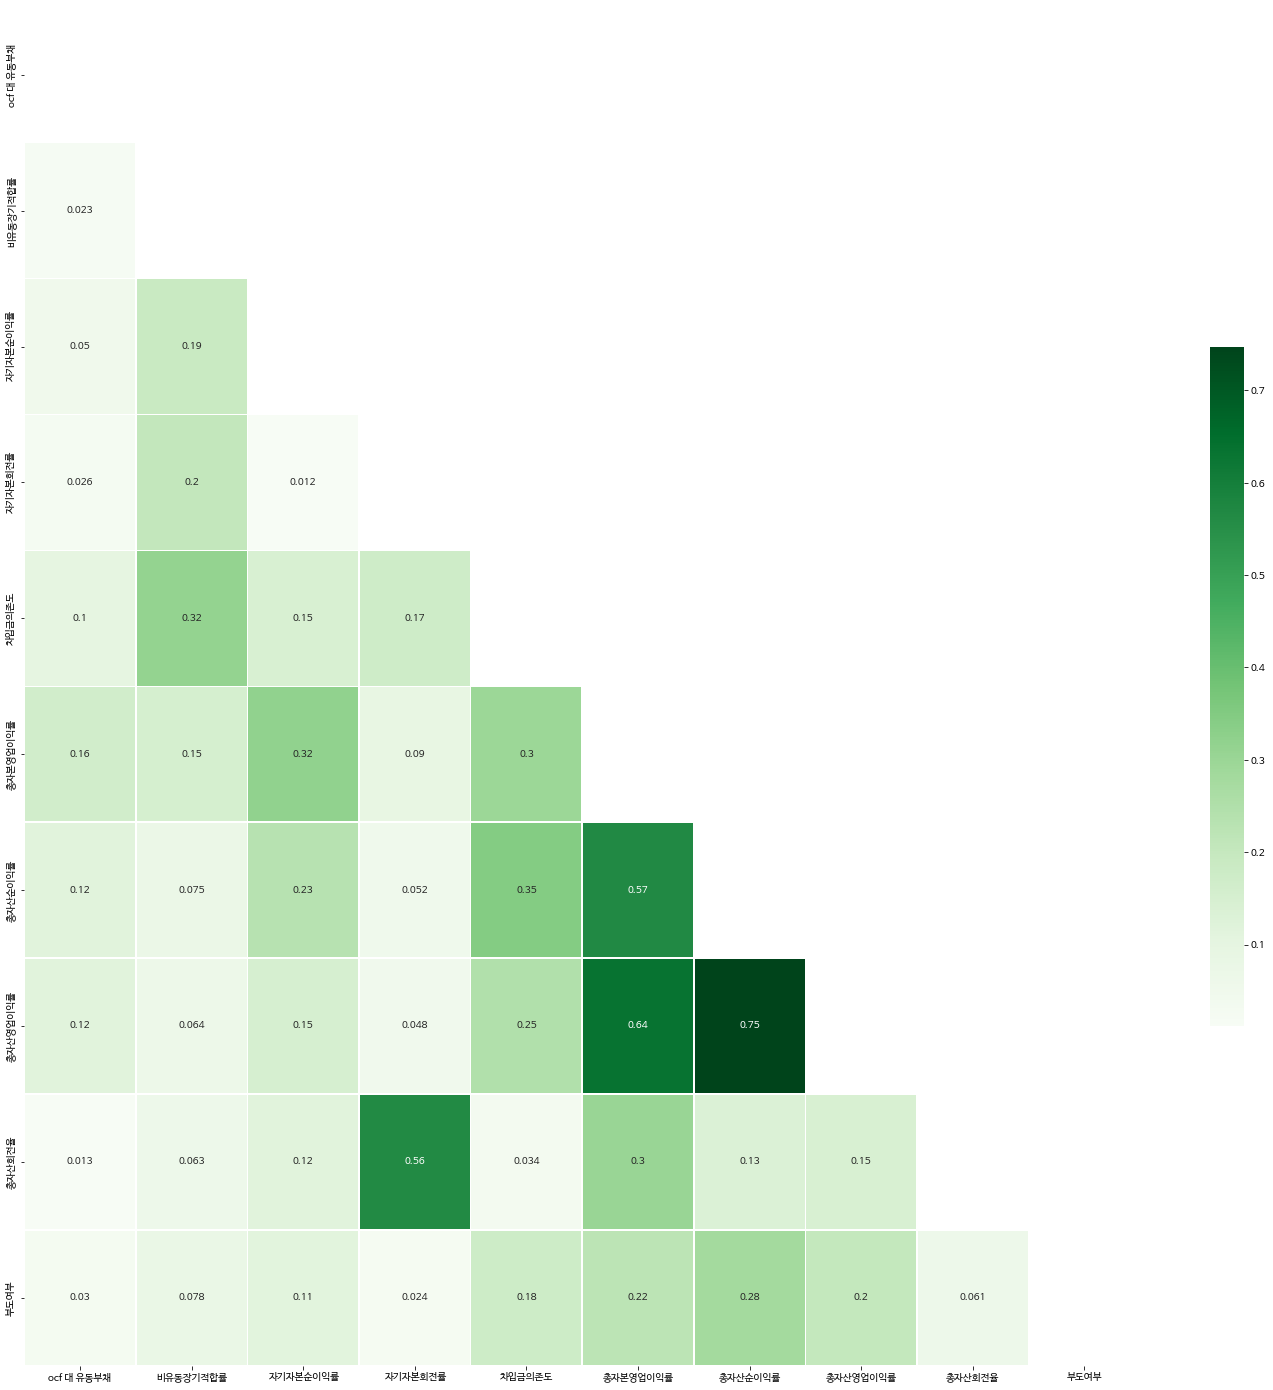

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,25))

df = data_2.corr()
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(abs(df),
            cbar=True,
            annot=True,
            mask=mask, 
            linewidths=0.5,
            cbar_kws={"shrink":.5},
            cmap='Greens')

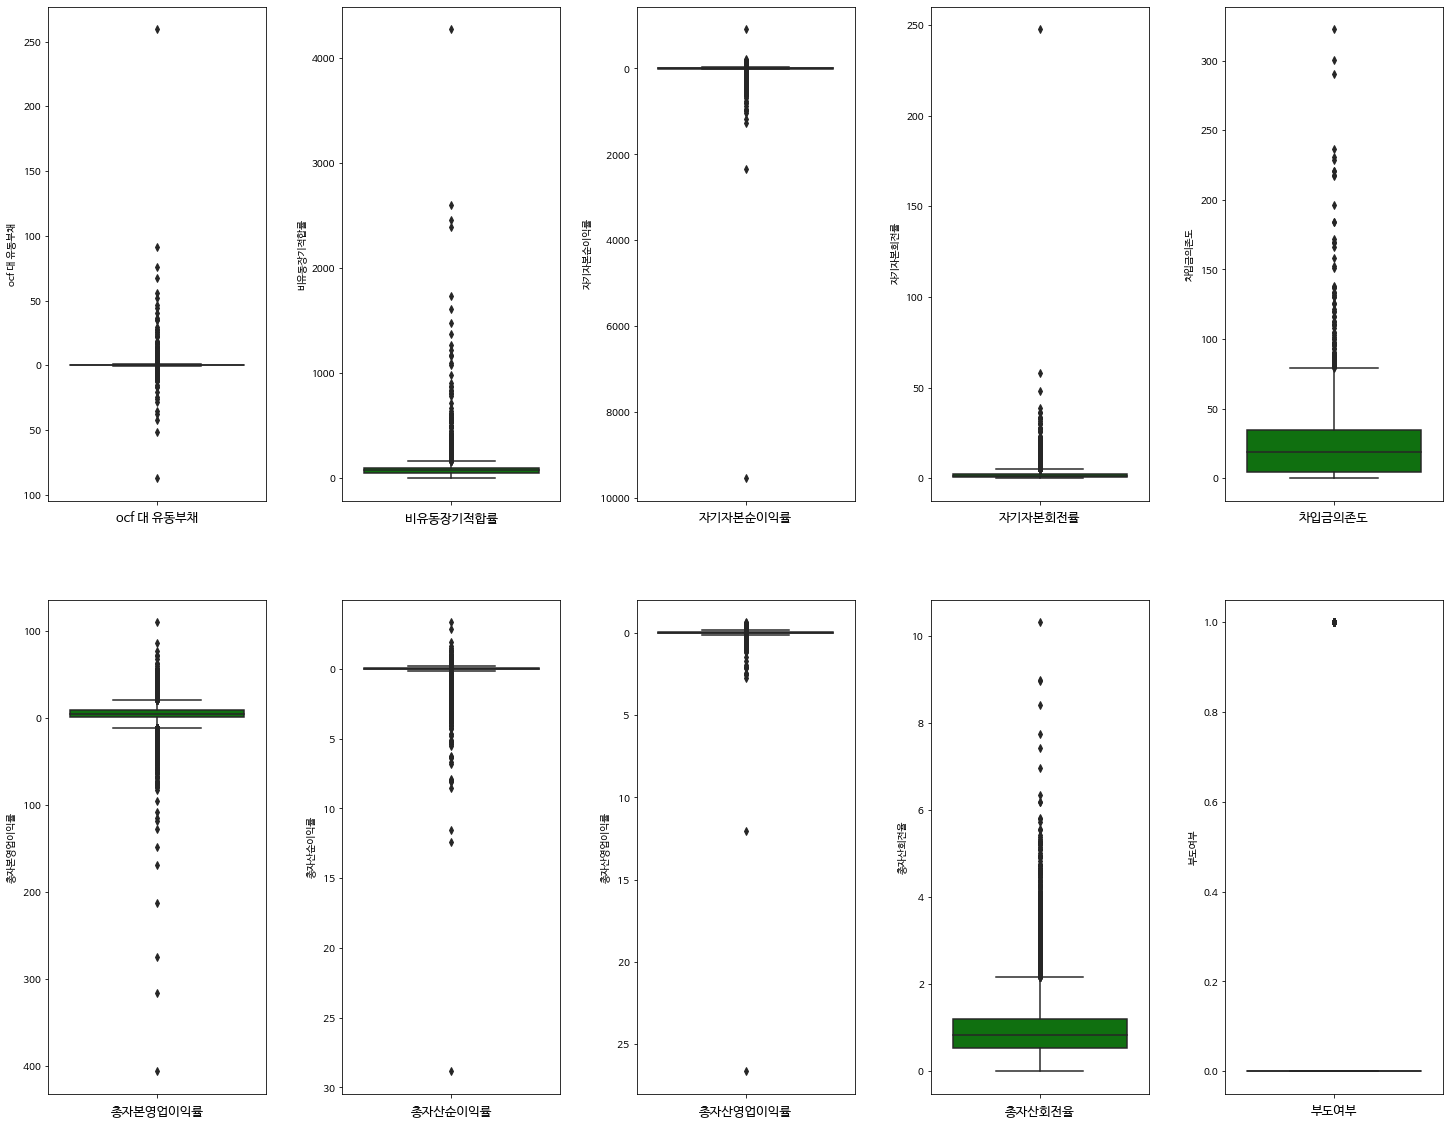

In [ ]:
col_num=data_2.select_dtypes(include=["int64","float64"]).columns.tolist()
import seaborn as sns
fig,axs=plt.subplots(2,5,figsize=(25,20))
for col, ax in zip(col_num, axs.flatten()):
  b = sns.boxplot(y=data_2[col], ax=ax, color='green')
  b.set_xlabel(col, fontsize=13)
  plt.subplots_adjust(wspace=.35)

In [ ]:
data_2.to_csv("변수선정완료.csv")

# Scaling 진행

In [ ]:
# 정상과 부도 기업의 비율을 맞춰 split
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_2.drop(['부도여부'], axis=1), data_2['부도여부'], 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=777, 
                                                    stratify=data_2['부도여부'])

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0.0    13920
1.0      152
Name: 부도여부, dtype: int64
0.0    3481
1.0      38
Name: 부도여부, dtype: int64


In [ ]:
data_2.describe()

,총자산순이익률,차입금의존도,총자본영업이익률,총자산영업이익률,비유동장기적합률,자기자본회전률,자기자본순이익률,ocf 대 유동부채,총자산회전율,부도여부
count,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000
mean,-0.023681,21.741482,3.717373,0.028559,83.283070,1.990701,-3.266259,0.303268,0.948889,0.010801
std,0.425431,19.815872,11.843383,0.252665,72.448219,2.880039,88.517143,2.858432,0.658002,0.103368
min,-28.844252,0.000000,-406.460000,-26.682140,0.000000,0.000000,-9535.640000,-87.348397,0.000000,0.000000
25%,-0.010763,4.460000,0.470000,0.004611,54.735000,0.820000,-1.340000,-0.025346,0.544941,0.000000
50%,0.028889,18.800000,3.940000,0.037800,76.830000,1.440000,5.280000,0.156276,0.828932,0.000000
75%,0.069514,34.350000,8.490000,0.080275,100.325000,2.440000,12.300000,0.444592,1.194622,0.000000
max,3.364062,322.710000,109.710000,0.678386,4276.030000,247.810000,917.140000,259.726413,10.318173,1.000000


In [ ]:
# 이상치의 영향을 최소화하는 RobustScaler

X_train_rs = X_train
X_test_rs = X_test

for i in X_train.columns:
  rs = RobustScaler()
  X_train_rs[i] = rs.fit_transform(X_train_rs[i].values.reshape(-1,1))
  X_test_rs[i] = rs.transform(X_test_rs[i].values.reshape(-1,1))
    
X_train_rs.head(5)

,ocf 대 유동부채,비유동장기적합률,자기자본순이익률,자기자본회전률,차입금의존도,총자본영업이익률,총자산순이익률,총자산영업이익률,총자산회전율
11287,3.948693,-0.874952,3.818049,0.012270,-0.519887,6.067164,4.174301,5.057810,0.514915
18995,-1.037843,-0.169947,-1.763464,1.871166,0.955899,-2.126866,-1.089466,-1.993893,1.228087
15947,-0.082492,-0.801272,-1.841339,-0.282209,0.079547,-1.199005,-1.958062,-1.237460,-0.283797
15488,-0.359071,-0.294940,1.283843,0.165644,0.723248,0.920398,0.818674,0.932663,-0.129352
4612,-0.141993,-0.797763,0.056041,1.165644,0.840739,0.067164,-0.039793,0.064634,1.042068


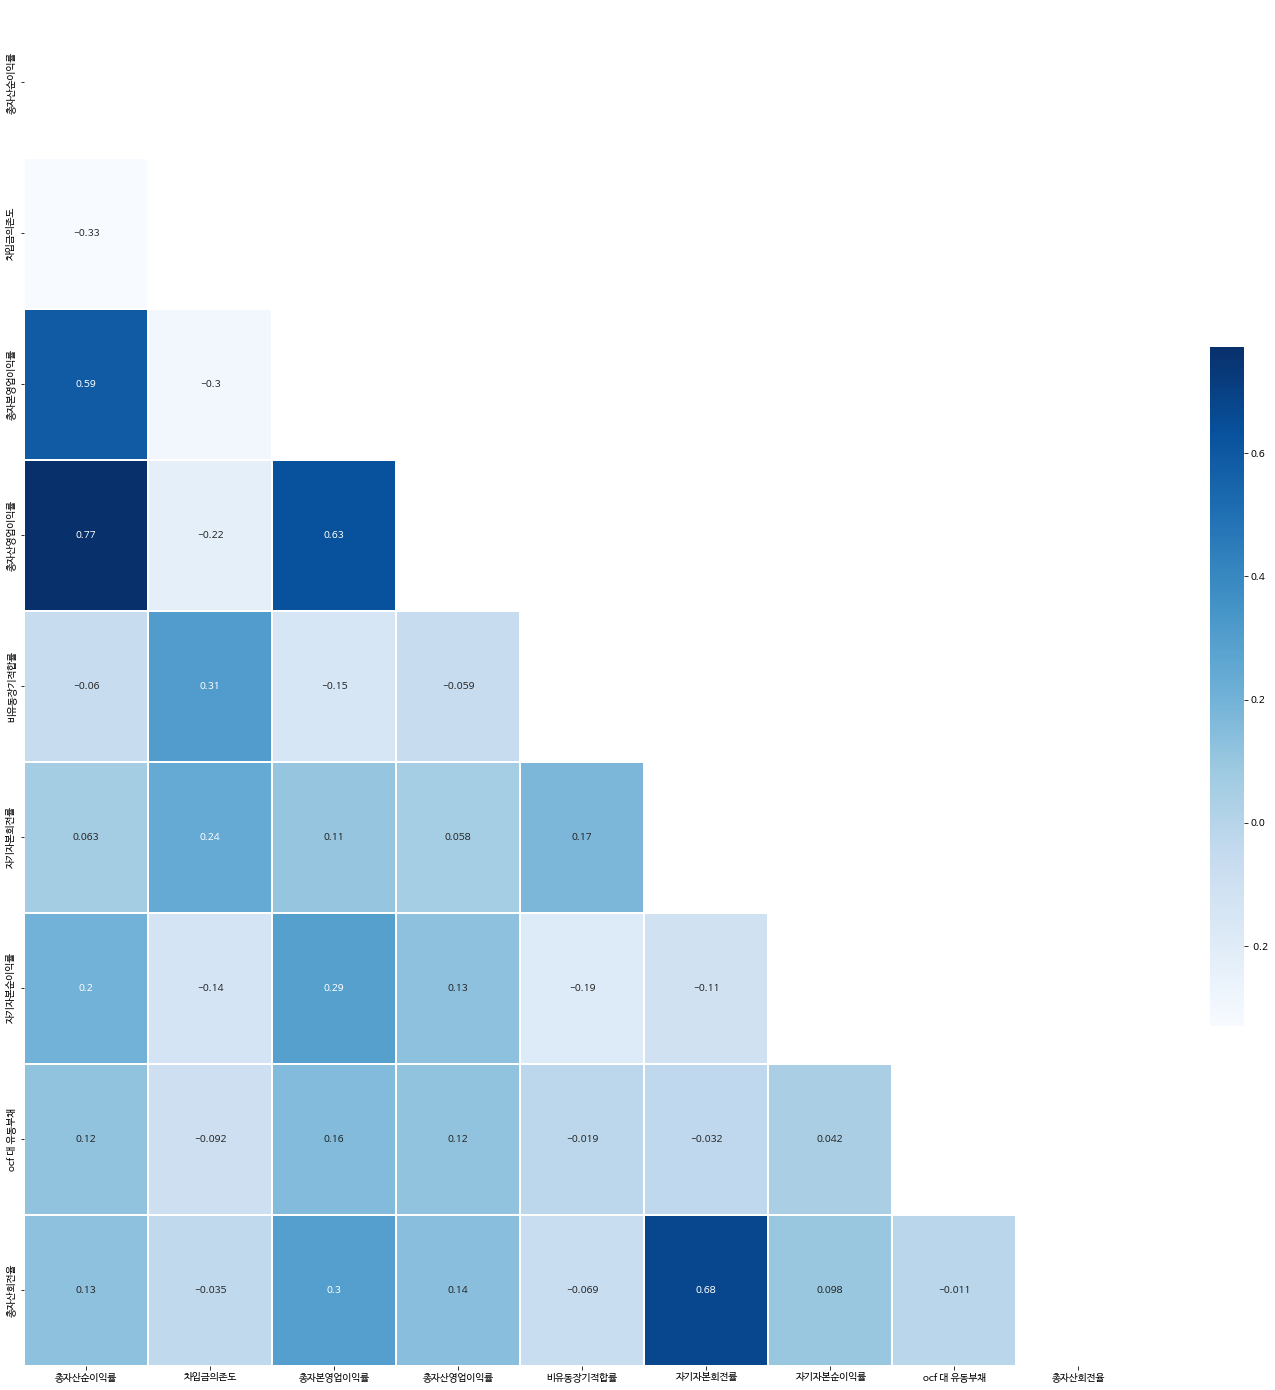

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,25))
df_train_hit = X_train_rs.corr()
df_test_hit = X_test_rs.corr()
mask = np.zeros_like(df_train_hit, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df_train_hit,
            cbar=True,
            annot=True,
            mask=mask, 
            linewidths=0.5,
            cbar_kws={"shrink":.5},
            cmap='Blues')

In [ ]:
cd /content/drive/MyDrive/금융빅데이터분석가/기업 부실 예측/data

/content/drive/MyDrive/금융빅데이터분석가/기업 부실 예측/data


In [ ]:
X_train_rs.to_csv("X_train.csv")
X_test_rs.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")